## Cargar Dataframes


In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.types import DoubleType, IntegerType
from pyspark.sql.functions import (
    col, lit, expr, when, split, trim, upper, substring, round,
    count, avg, sum, max, min,
    datediff, current_date,
    array, explode, struct, regexp_replace
)
import re

In [2]:
# ==============================
# 1. Inicializar Spark Session
# ==============================
spark = SparkSession.builder \
    .appName("HDFS_NiFi_Data_Cleaning") \
    .master("spark://spark-master:7077") \
    .config("spark.hadoop.fs.defaultFS", "hdfs://namenode:9000") \
    .config("spark.executor.memory", "1g") \
    .config("spark.executor.cores", "2") \
    .config("spark.cores.max", "4") \
    .config("spark.driver.memory", "1g") \
    .config("spark.driver.host", "jupyter") \
    .config("spark.driver.bindAddress", "0.0.0.0") \
    .getOrCreate()

print("Sesión creada correctamente")

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/11/21 22:11:49 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Sesión creada correctamente


In [3]:
# ==============================
# 2. Paths en HDFS
# ==============================
hdfs_base_path = "hdfs://namenode:9000/user/nifi/"

# --- CSVs ---
hdfs_path_maestra = hdfs_base_path + "maestra.csv"
hdfs_path_zona = hdfs_base_path + "bd_zona.csv"
hdfs_path_json = hdfs_base_path + "datos.json"
hdfs_path_val_prod = hdfs_base_path + "Valores-Venta_Producto.csv"
hdfs_path_uni_prod = hdfs_base_path + "Unidades-Venta_Producto.csv"
hdfs_path_val_fam = hdfs_base_path + "Valores-Venta_Familia.csv"
hdfs_path_uni_fam = hdfs_base_path + "Unidades-Venta_Familia.csv"

In [4]:
# ===============================================
# 2. Carga de Datos en DataFrames de Spark
# ===============================================

# Opción de codificación para tildes y ñ
encoding_python = "UTF-8"

print("--- 1. Cargando Archivos Maestros (Separador ';') ---")
# Primer CSV (Maestra)
print("--- CSV Maestra ---")
df_maestra = spark.read.option("encoding", encoding_python) \
                       .csv(hdfs_path_maestra, header=True, inferSchema=True, sep=";")
df_maestra.show()

# Segundo CSV (Zona)
print("--- CSV Zona ---")
df_zona = spark.read.option("encoding", encoding_python) \
                    .csv(hdfs_path_zona, header=True, inferSchema=True, sep=";")
df_zona.show()


print("--- 2. Cargando JSON de Base de Datos ---")
print("--- Json Zona ---")
df_datos_zona_json = spark.read.json(hdfs_path_json)
df_datos_zona_json.show()


print("--- 3. Cargando CSVs de Ventas (Separador ',') ---")

# Valores Producto
print("--- CSV Valores Producto ---")
df_valores_producto = spark.read.option("encoding", encoding_python) \
                            .csv(hdfs_path_val_prod, header=True, inferSchema=True, sep=",")
df_valores_producto.show()

# Unidades Producto
print("--- CSV Unidades Producto ---")
df_unidades_producto = spark.read.option("encoding", encoding_python) \
                             .csv(hdfs_path_uni_prod, header=True, inferSchema=True, sep=",")
df_unidades_producto.show()

# Valores Familia
print("--- CSV Valores Familia ---")
df_valores_familia = spark.read.option("encoding", encoding_python) \
                           .csv(hdfs_path_val_fam, header=True, inferSchema=True, sep=",")
df_valores_familia.show()

# Unidades Familia
print("--- CSV Unidades Familia ---")
df_unidades_familia = spark.read.option("encoding", encoding_python) \
                            .csv(hdfs_path_uni_fam, header=True, inferSchema=True, sep=",")
df_unidades_familia.show()

print("--- ✅ Carga completada. Los 6 DataFrames estan listos. ---")

--- 1. Cargando Archivos Maestros (Separador ';') ---
--- CSV Maestra ---


+-----------+------------------+--------------------+
|   Producto|Numero de articulo|         Descripcion|
+-----------+------------------+--------------------+
|LAGRICEL PF|             41582|LAGRICEL OFTENO L...|
| ELIPTIC PF|             41561|ELIPTIC OFTENO 5M...|
|   LAGRICEL|             40515|LAGRICEL OFTENO 0...|
|FLUMETOL NF|             40513|FLUMETOL NF OFTEN...|
| TRAZIDEX O|             40341|TRAZIDEX OFTENO 5...|
| TRAZIDEX U|             40342|TRAZIDEX UNGENA 3...|
|  SOPHIPREN|             40338|SOPHIPREN OFTENO ...|
|       GAAP|             40498|    GAAP OFTENO 3 ML|
|   AQUADRAN|             41945|        AQUADRAN 10G|
|    GAAP PF|             41567|GAAP OFTENO LIBRE...|
|   ZEBESTEN|             41604|   ZEBESTEN 5ML PERU|
|     LANDAX|             41804|          LANDAX 5ML|
|     ELAR-B|             42098|         ELAR-B 5 ML|
|   DUSTALOX|             41121|        DUSTALOX 5ML|
|    ELIPTIC|             41076|  ELIPTIC OFTENO 5ML|
|     AGGLAD|             40

25/11/21 22:12:01 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-----------+-----------+------------------+------------------+------------------+---------+------------------+------------------+------------------+--------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+--------------------+-----------------+------------------+------------------+-------------------+-------------+------------------+------------------+---------+-----------------+------------------+------------------+-------------+--------------+------------------+------------------+----------+----------------+------------------+------------------+------------+----------------+------------------+------------------+------------+------------------+------------------+------------------+------------------+
|       Zona|   Producto|     Enero 

+-----------+-----------+-------------+-----------+------------+---------+---------------+------------------+--------------+------------------+-------------+------------------+------------+-------------------+-------------+------------------+------------+-------------------+------------+------------------+-----------+--------------------+------------+------------------+-----------+--------------------+------------+------------------+-----------+-------------------+-------------+------------------+------------+---------+-----------------+------------------+----------------+-------------+--------------+------------------+-------------+----------+----------------+------------------+---------------+------------+----------------+------------------+---------------+------------+--------------+------------------+-------------+------------------+
|       Zona|   Producto|Enero _Venta |Enero _TGT |Enero _PY 24|Enero _% |Febrero _Venta |     Febrero _TGT |Febrero _PY 24|       Febrero _% |Marzo _

### Exploración de datos

In [5]:
df_maestra.printSchema()
df_maestra.show(truncate=False)

root
 |-- Producto: string (nullable = true)
 |-- Numero de articulo: integer (nullable = true)
 |-- Descripcion: string (nullable = true)

+-----------+------------------+-------------------------------------------------+
|Producto   |Numero de articulo|Descripcion                                      |
+-----------+------------------+-------------------------------------------------+
|LAGRICEL PF|41582             |LAGRICEL OFTENO LIBRE DE CONSERVADORES (PF) 10 ML|
|ELIPTIC PF |41561             |ELIPTIC OFTENO 5ML PF PERU                       |
|LAGRICEL   |40515             |LAGRICEL OFTENO 0.5 ML                           |
|FLUMETOL NF|40513             |FLUMETOL NF OFTENO 5ML                           |
|TRAZIDEX O |40341             |TRAZIDEX OFTENO 5 ML.                            |
|TRAZIDEX U |40342             |TRAZIDEX UNGENA 3.5 G                            |
|SOPHIPREN  |40338             |SOPHIPREN OFTENO 5 ML                            |
|GAAP       |40498            

In [6]:
df_zona.printSchema()
df_zona.show(truncate=False)

root
 |-- Vendedor: string (nullable = true)
 |-- Nombre Cliente: string (nullable = true)
 |-- Producto: string (nullable = true)
 |-- MES NUM: integer (nullable = true)
 |-- Mes: string (nullable = true)
 |-- 2025: string (nullable = true)
 |-- CANTIDAD: string (nullable = true)

+-----------+-----------------------------------------------------------------+-----------+-------+---+-------+--------+
|Vendedor   |Nombre Cliente                                                   |Producto   |MES NUM|Mes|2025   |CANTIDAD|
+-----------+-----------------------------------------------------------------+-----------+-------+---+-------+--------+
|Pharma - N1|ADMINISTRADORA CLINICA TRESA S.A                                 |AGGLAD     |1      |ENE|0      |0       |
|Pharma - N1|ADMINISTRADORA CLINICA TRESA S.A                                 |FLUMETOL NF|1      |ENE|0      |0       |
|Pharma - N1|ADMINISTRADORA CLINICA TRESA S.A                                 |GAAP       |1      |ENE|0      |0

In [7]:
df_datos_zona_json.printSchema()
df_datos_zona_json.show(truncate=False)

root
 |-- created_at: string (nullable = true)
 |-- is_active: boolean (nullable = true)
 |-- region: string (nullable = true)
 |-- zone_code: string (nullable = true)
 |-- zone_description: string (nullable = true)
 |-- zone_id: long (nullable = true)
 |-- zone_name: string (nullable = true)

+--------------------------+---------+--------+---------+----------------------------------------------+-------+-----------+
|created_at                |is_active|region  |zone_code|zone_description                              |zone_id|zone_name  |
+--------------------------+---------+--------+---------+----------------------------------------------+-------+-----------+
|2025-09-29 21:30:27.300355|true     |Centro  |Z1       |Zona de Lima Metropolitana                    |1      |Lima       |
|2025-09-29 21:30:27.300355|true     |Centro  |Z2       |Zona de Callao y Provincia Constitucional     |2      |Callao     |
|2025-09-29 21:30:27.300355|true     |Norte   |Z3       |Zona de Norte Chico - H

In [8]:
df_valores_producto.printSchema()
df_valores_producto.show(truncate=False)

root
 |-- Zona: string (nullable = true)
 |-- Producto: string (nullable = true)
 |-- Enero _Venta : double (nullable = true)
 |-- Enero _TGT : double (nullable = true)
 |-- Enero _PY 24: double (nullable = true)
 |-- Enero _% : integer (nullable = true)
 |-- Febrero _Venta : double (nullable = true)
 |-- Febrero _TGT : double (nullable = true)
 |-- Febrero _PY 24: double (nullable = true)
 |-- Febrero _% : double (nullable = true)
 |-- Marzo _Venta : double (nullable = true)
 |-- Marzo _TGT : double (nullable = true)
 |-- Marzo _PY 24: double (nullable = true)
 |-- Marzo _% : double (nullable = true)
 |-- Abril _Venta : double (nullable = true)
 |-- Abril _TGT : double (nullable = true)
 |-- Abril _PY 24: double (nullable = true)
 |-- Abril _% : double (nullable = true)
 |-- Mayo _Venta : double (nullable = true)
 |-- Mayo _TGT : double (nullable = true)
 |-- Mayo _PY 24: double (nullable = true)
 |-- Mayo _% : double (nullable = true)
 |-- Junio_Venta : double (nullable = true)
 |-- 

In [9]:
df_unidades_producto.printSchema()
df_unidades_producto.show(truncate=False)

root
 |-- Zona: string (nullable = true)
 |-- Producto: string (nullable = true)
 |-- Enero _Venta : integer (nullable = true)
 |-- Enero _TGT : integer (nullable = true)
 |-- Enero _PY 24: integer (nullable = true)
 |-- Enero _% : integer (nullable = true)
 |-- Febrero _Venta : integer (nullable = true)
 |-- Febrero _TGT : double (nullable = true)
 |-- Febrero _PY 24: integer (nullable = true)
 |-- Febrero _% : double (nullable = true)
 |-- Marzo _Venta : integer (nullable = true)
 |-- Marzo _TGT : double (nullable = true)
 |-- Marzo _PY 24: integer (nullable = true)
 |-- Marzo _% : double (nullable = true)
 |-- Abril _Venta : integer (nullable = true)
 |-- Abril _TGT : double (nullable = true)
 |-- Abril _PY 24: integer (nullable = true)
 |-- Abril _% : double (nullable = true)
 |-- Mayo _Venta : integer (nullable = true)
 |-- Mayo _TGT : double (nullable = true)
 |-- Mayo _PY 24: integer (nullable = true)
 |-- Mayo _% : double (nullable = true)
 |-- Junio_Venta : integer (nullable =

In [10]:
df_valores_familia.printSchema()
df_valores_familia.show(truncate=False)

root
 |-- Zona: string (nullable = true)
 |-- Producto: string (nullable = true)
 |-- Enero _Venta : double (nullable = true)
 |-- Enero _TGT : double (nullable = true)
 |-- Enero _PY 24: double (nullable = true)
 |-- Enero _% : integer (nullable = true)
 |-- Febrero _Venta : double (nullable = true)
 |-- Febrero _TGT : double (nullable = true)
 |-- Febrero _PY 24: double (nullable = true)
 |-- Febrero _% : double (nullable = true)
 |-- Marzo _Venta : double (nullable = true)
 |-- Marzo _TGT : double (nullable = true)
 |-- Marzo _PY 24: double (nullable = true)
 |-- Marzo _% : double (nullable = true)
 |-- Abril _Venta : double (nullable = true)
 |-- Abril _TGT : double (nullable = true)
 |-- Abril _PY 24: double (nullable = true)
 |-- Abril _% : double (nullable = true)
 |-- Mayo _Venta : double (nullable = true)
 |-- Mayo _TGT : double (nullable = true)
 |-- Mayo _PY 24: double (nullable = true)
 |-- Mayo _% : double (nullable = true)
 |-- Junio_Venta : double (nullable = true)
 |-- 

In [11]:
df_unidades_familia.printSchema()
df_unidades_familia.show(truncate=False)

root
 |-- Zona: string (nullable = true)
 |-- Producto: string (nullable = true)
 |-- Enero _Venta : integer (nullable = true)
 |-- Enero _TGT : integer (nullable = true)
 |-- Enero _PY 24: integer (nullable = true)
 |-- Enero _% : integer (nullable = true)
 |-- Febrero _Venta : integer (nullable = true)
 |-- Febrero _TGT : double (nullable = true)
 |-- Febrero _PY 24: integer (nullable = true)
 |-- Febrero _% : double (nullable = true)
 |-- Marzo _Venta : integer (nullable = true)
 |-- Marzo _TGT : double (nullable = true)
 |-- Marzo _PY 24: integer (nullable = true)
 |-- Marzo _% : double (nullable = true)
 |-- Abril _Venta : integer (nullable = true)
 |-- Abril _TGT : double (nullable = true)
 |-- Abril _PY 24: integer (nullable = true)
 |-- Abril _% : double (nullable = true)
 |-- Mayo _Venta : integer (nullable = true)
 |-- Mayo _TGT : double (nullable = true)
 |-- Mayo _PY 24: integer (nullable = true)
 |-- Mayo _% : double (nullable = true)
 |-- Junio_Venta : integer (nullable =

## TRANSFORMACIÓN

## Limpieza de datos

In [12]:
# ==============================================================================
# LIMPIEZA PROFUNDA DE DATASETS - PREPARACIÓN PARA ELT
# ==============================================================================
print("--- 🧹 INICIANDO LIMPIEZA PROFUNDA DE TODOS LOS DATASETS ---\n")


# Función para normalizar texto (quitar tildes y ñ)
def normalize_text_column(df, column_name):
    """
    Normaliza una columna de texto:
    - Reemplaza tildes: á→a, é→e, í→i, ó→o, ú→u
    - Reemplaza ñ→n
    - Convierte a mayúsculas para estandarizar
    """
    df = df.withColumn(column_name, regexp_replace(col(column_name), "[áÁ]", "a"))
    df = df.withColumn(column_name, regexp_replace(col(column_name), "[éÉ]", "e"))
    df = df.withColumn(column_name, regexp_replace(col(column_name), "[íÍ]", "i"))
    df = df.withColumn(column_name, regexp_replace(col(column_name), "[óÓ]", "o"))
    df = df.withColumn(column_name, regexp_replace(col(column_name), "[úÚ]", "u"))
    df = df.withColumn(column_name, regexp_replace(col(column_name), "[ñÑ]", "n"))
    df = df.withColumn(column_name, upper(trim(col(column_name))))
    return df

# Función genérica de limpieza
def clean_dataset(df, dataset_name, text_columns=[], numeric_columns=[]):
    """
    Limpia un DataFrame de Spark:
    1. Elimina filas completamente vacías
    2. Normaliza columnas de texto (quita tildes/ñ)
    3. Elimina nulos en columnas numéricas críticas
    4. Remueve outliers extremos (valores > percentil 99 o < 0)
    """
    print(f"--- Limpiando: {dataset_name} ---")
    initial_count = df.count()
    
    # 1. Eliminar filas completamente nulas
    df_clean = df.dropna(how='all')
    
    # 2. Normalizar columnas de texto
    for col_name in text_columns:
        if col_name in df_clean.columns:
            df_clean = normalize_text_column(df_clean, col_name)
    
    # 3. Rellenar nulos en columnas numéricas con 0 (o eliminar según regla de negocio)
    for col_name in numeric_columns:
        if col_name in df_clean.columns:
            # Eliminar nulos en métricas clave
            df_clean = df_clean.filter(col(col_name).isNotNull())
            # Convertir a Double para evitar errores de tipo
            df_clean = df_clean.withColumn(col_name, col(col_name).cast(DoubleType()))
    
    # 4. Remover outliers extremos en columnas numéricas (valores negativos o anormales)
    for col_name in numeric_columns:
        if col_name in df_clean.columns:
            # Filtrar valores negativos (no puede haber ventas negativas)
            df_clean = df_clean.filter(col(col_name) >= 0)
            
            # Opcional: Eliminar valores superiores al percentil 99 (outliers extremos)
            # Descomentar si los datos tienen errores de captura (ej. 999999999)
            # percentile_99 = df_clean.approxQuantile(col_name, [0.99], 0.01)[0]
            # df_clean = df_clean.filter(col(col_name) <= percentile_99)
    
    final_count = df_clean.count()
    removed = initial_count - final_count
    print(f"  ✅ Registros iniciales: {initial_count}")
    print(f"  ✅ Registros finales:   {final_count}")
    print(f"  🗑️  Registros eliminados: {removed}\n")
    
    return df_clean


# ==============================================================================
# APLICAR LIMPIEZA A CADA DATASET
# ==============================================================================

# 1. Limpieza df_maestra
df_maestra = clean_dataset(
    df_maestra, 
    "Tabla Maestra de Productos",
    text_columns=["Producto", "Descripcion", "Numero de articulo"],
    numeric_columns=[]
)

# 2. Limpieza df_zona
df_zona = clean_dataset(
    df_zona,
    "Tabla de Ventas por Zona (bd_zona.csv)",
    text_columns=["Vendedor", "Nombre Cliente", "Producto", "MES"],
    numeric_columns=["2025", "CANTIDAD", "MES NUM"]
)

# 3. Limpieza df_datos_zona_json
df_datos_zona_json = clean_dataset(
    df_datos_zona_json,
    "Datos Geográficos (JSON)",
    text_columns=["zone_code", "zone_name", "region"],
    numeric_columns=[]
)

# 4. Limpieza df_valores_producto
df_valores_producto = clean_dataset(
    df_valores_producto,
    "Valores de Venta por Producto",
    text_columns=["Zona", "Producto"],
    numeric_columns=[c for c in df_valores_producto.columns if "TGT" in c or "PY" in c]
)

# 5. Limpieza df_unidades_producto
df_unidades_producto = clean_dataset(
    df_unidades_producto,
    "Unidades de Venta por Producto",
    text_columns=["Zona", "Producto"],
    numeric_columns=[c for c in df_unidades_producto.columns if "TGT" in c or "PY" in c]
)

# 6. Limpieza df_valores_familia
df_valores_familia = clean_dataset(
    df_valores_familia,
    "Valores de Venta por Familia",
    text_columns=["Zona", "Producto"],
    numeric_columns=[c for c in df_valores_familia.columns if "TGT" in c or "PY" in c]
)

# 7. Limpieza df_unidades_familia
df_unidades_familia = clean_dataset(
    df_unidades_familia,
    "Unidades de Venta por Familia",
    text_columns=["Zona", "Producto"],
    numeric_columns=[c for c in df_unidades_familia.columns if "TGT" in c or "PY" in c]
)

print("="*60)
print("✅ LIMPIEZA COMPLETADA EN TODOS LOS DATASETS")
print("="*60)
print("Ahora puedes continuar con las transformaciones ELT sin problemas de:")
print("  - Tildes o caracteres especiales")
print("  - Valores nulos críticos")
print("  - Outliers extremos que distorsionen el modelo")
print("="*60)

--- 🧹 INICIANDO LIMPIEZA PROFUNDA DE TODOS LOS DATASETS ---

--- Limpiando: Tabla Maestra de Productos ---
  ✅ Registros iniciales: 16
  ✅ Registros finales:   16
  🗑️  Registros eliminados: 0

--- Limpiando: Tabla de Ventas por Zona (bd_zona.csv) ---
  ✅ Registros iniciales: 4884
  ✅ Registros finales:   3858
  🗑️  Registros eliminados: 1026

--- Limpiando: Datos Geográficos (JSON) ---
  ✅ Registros iniciales: 9
  ✅ Registros finales:   9
  🗑️  Registros eliminados: 0

--- Limpiando: Valores de Venta por Producto ---
  ✅ Registros iniciales: 96
  ✅ Registros finales:   92
  🗑️  Registros eliminados: 4

--- Limpiando: Unidades de Venta por Producto ---
  ✅ Registros iniciales: 96
  ✅ Registros finales:   92
  🗑️  Registros eliminados: 4

--- Limpiando: Valores de Venta por Familia ---
  ✅ Registros iniciales: 72
  ✅ Registros finales:   69
  🗑️  Registros eliminados: 3

--- Limpiando: Unidades de Venta por Familia ---
  ✅ Registros iniciales: 72
  ✅ Registros finales:   70
  🗑️  Regist

## Paso 1: Transformación de la Tabla Transaccional (Ventas Cliente)

En este paso normalizamos la tabla principal bd_zona.csv. Renombramos columnas confusas, ajustamos los tipos de datos (números y texto) y extraemos el código de la zona para poder cruzar información más adelante.

In [13]:
print("--- 🚀 INICIANDO PROCESO ELT PARA MODELO DE RECOMENDACIÓN ---")
# ==============================================================================
# PASO 1: LIMPIEZA DE LA TABLA PRINCIPAL (df_zona)
# ==============================================================================

# Renombramos columnas para estándares de ingeniería de datos
df_transaccional = df_zona.withColumnRenamed("2025", "Venta_Valor") \
                          .withColumnRenamed("CANTIDAD", "Venta_Unidades") \
                          .withColumnRenamed("MES NUM", "Mes_Num") \
                          .withColumnRenamed("Nombre Cliente", "Cliente")

# Extraemos el código de zona (ej. de "Pharma - Z1" obtenemos "Z1")
df_transaccional = df_transaccional.withColumn(
    "zone_code_join", 
    trim(split(col("Vendedor"), "-").getItem(1))
)

# Aseguramos que los montos y cantidades sean numéricos
df_transaccional = df_transaccional.withColumn("Venta_Valor", col("Venta_Valor").cast(DoubleType())) \
                                   .withColumn("Venta_Unidades", col("Venta_Unidades").cast(IntegerType())) \
                                   .withColumn("Mes_Num", col("Mes_Num").cast(IntegerType()))

--- 🚀 INICIANDO PROCESO ELT PARA MODELO DE RECOMENDACIÓN ---


## Paso 2: Preparación de Dimensiones (Geografía y Producto)

Preparamos las tablas maestras. Del JSON geográfico seleccionamos solo lo necesario (Región, Zona). De la Maestra de Productos, obtenemos el nombre oficial para estandarizar las descripciones.

In [14]:
# ==============================================================================
# PASO 2: PREPARACIÓN DE DIMENSIONES (GEO Y PRODUCTO)
# ==============================================================================

# 2a. Dimensión Geográfica (JSON)
df_geo = df_datos_zona_json.select(
    trim(col("zone_code")).alias("zone_code"),
    col("zone_name").alias("Nombre_Zona"),
    col("region").alias("Region")
)

# 2b. Dimensión Producto (CSV Maestra)
# Seleccionamos la llave (Producto) y el nombre real (Descripcion)
df_prod_maestra = df_maestra.select(
    trim(col("Producto")).alias("Producto_Key"), 
    col("Descripcion").alias("Nombre_Producto_Oficial"),
    col("Numero de articulo").alias("ID_Articulo") 
)

## Paso 3: Enriquecimiento Inicial y Cálculo de Precios

Unimos las ventas con la geografía y los nombres oficiales. Además, creamos una variable clave para el modelo: el Precio Unitario, que nos ayudará a entender la elasticidad de la demanda.

In [15]:
# ==============================================================================
# PASO 3: ENRIQUECIMIENTO INICIAL (JOINS) Y FEATURE ENGINEERING BÁSICO
# ==============================================================================

# Join 1: Ventas + Geografía
df_step1 = df_transaccional.join(
    df_geo,
    df_transaccional.zone_code_join == df_geo.zone_code,
    "left"
)

# Join 2: Resultado + Maestra de Productos
df_master_analytics = df_step1.join(
    df_prod_maestra,
    trim(df_step1.Producto) == df_prod_maestra.Producto_Key,
    "left"
)

# Selección final y Cálculo de Precio Unitario
# IMPORTANTE: Aquí agregamos 'zone_code_join' y 'Producto_Key' para usarlas después
df_final = df_master_analytics.withColumn(
    "Precio_Unitario", 
    when(col("Venta_Unidades") > 0, 
         round(col("Venta_Valor") / col("Venta_Unidades"), 2)
    ).otherwise(0.0)
).select(
    col("zone_code_join"), # <--- Necesario para cruzar con Contexto Zona
    col("Producto_Key"),   # <--- Necesario para cruzar con Contexto Producto
    "Region",
    "Nombre_Zona",
    "Cliente",
    # Si existe nombre oficial lo usa, si no, usa el original
    when(col("Nombre_Producto_Oficial").isNotNull(), col("Nombre_Producto_Oficial"))
      .otherwise(col("Producto")).alias("Producto"), 
    "ID_Articulo",
    "Mes_Num",
    "Mes",
    "Venta_Unidades",
    "Venta_Valor",
    "Precio_Unitario"
)

print("--- ✅ Fase 1 Completada: Dataset Transaccional con Llaves ---")
df_final.printSchema() # Verifica que zone_code_join y Producto_Key aparezcan aquí

--- ✅ Fase 1 Completada: Dataset Transaccional con Llaves ---
root
 |-- zone_code_join: string (nullable = true)
 |-- Producto_Key: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- Nombre_Zona: string (nullable = true)
 |-- Cliente: string (nullable = true)
 |-- Producto: string (nullable = true)
 |-- ID_Articulo: string (nullable = true)
 |-- Mes_Num: integer (nullable = true)
 |-- Mes: string (nullable = true)
 |-- Venta_Unidades: integer (nullable = true)
 |-- Venta_Valor: double (nullable = true)
 |-- Precio_Unitario: double (nullable = true)



In [16]:
df_final.show()

+--------------+------------+------+-----------+--------------------+--------------------+-----------+-------+---+--------------+-----------+---------------+
|zone_code_join|Producto_Key|Region|Nombre_Zona|             Cliente|            Producto|ID_Articulo|Mes_Num|Mes|Venta_Unidades|Venta_Valor|Precio_Unitario|
+--------------+------------+------+-----------+--------------------+--------------------+-----------+-------+---+--------------+-----------+---------------+
|            N1|      AGGLAD| NORTE|   CHICLAYO|ADMINISTRADORA CL...|  AGGLAD OFTENO 5 ML|      40351|      1|ENE|             0|        0.0|            0.0|
|            N1| FLUMETOL NF| NORTE|   CHICLAYO|ADMINISTRADORA CL...|FLUMETOL NF OFTEN...|      40513|      1|ENE|             0|        0.0|            0.0|
|            N1|        GAAP| NORTE|   CHICLAYO|ADMINISTRADORA CL...|    GAAP OFTENO 3 ML|      40498|      1|ENE|             0|        0.0|            0.0|
|            N1|    LAGRICEL| NORTE|   CHICLAYO|ADMI

## Paso 4: Integración del Contexto de Mercado (Unidades y Valores)

Aquí transformamos los archivos de reporte (que vienen con meses en columnas) a formato filas usando stack. Esto agrega al dataset las Metas y la Venta Histórica (PY) de la zona, permitiendo al modelo comparar el desempeño del cliente contra el mercado.

In [17]:
# ==============================================================================
# PASO 4: ENRIQUECIMIENTO CON CONTEXTO DE MERCADO (PRODUCTO)
# ==============================================================================
print("--- Procesando Contexto de Mercado (Unidades y Valores por Zona) ---")

# --- 🛠️ SUB-RUTINA DE CORRECCIÓN DE TIPOS 🛠️ ---
# Esta función fuerza a que todas las columnas numéricas sean Double
# para evitar el error "DATATYPE_MISMATCH" en el stack.
def cast_metrics_to_double(df):
    cols_to_cast = [c for c in df.columns if "TGT" in c or "PY" in c]
    for column_name in cols_to_cast:
        df = df.withColumn(column_name, col(column_name).cast(DoubleType()))
    return df

# 1. Aplicamos la corrección a los DataFrames de entrada
df_unidades_producto = cast_metrics_to_double(df_unidades_producto)
df_valores_producto = cast_metrics_to_double(df_valores_producto)
# También aplicamos a los de familia de una vez (para el Bloque 6)
df_unidades_familia = cast_metrics_to_double(df_unidades_familia)
df_valores_familia = cast_metrics_to_double(df_valores_familia)


# --- CONTINUAMOS CON EL PROCESO NORMAL ---

# Función auxiliar para la expresión 'stack'
def get_stack_expr(metric_suffix):
    return f"""stack(12, 
        'ENE', `Enero _{metric_suffix}`, `Enero _PY 24`,
        'FEB', `Febrero _{metric_suffix}`, `Febrero _PY 24`,
        'MAR', `Marzo _{metric_suffix}`, `Marzo _PY 24`,
        'ABR', `Abril _{metric_suffix}`, `Abril _PY 24`,
        'MAY', `Mayo _{metric_suffix}`, `Mayo _PY 24`,
        'JUN', `Junio_{metric_suffix}`, `Junio_PY 24`,
        'JUL', `Julio_{metric_suffix}`, `Julio_PY 24`,
        'AGO', `Agosto_{metric_suffix}`, `Agosto_PY 24`,
        'SEP', `Septiembre_{metric_suffix}`, `Septiembre_PY 24`,
        'OCT', `Octubre_{metric_suffix}`, `Octubre_PY 24`,
        'NOV', `Noviembre_{metric_suffix}`, `Noviembre_PY 24`,
        'DIC', `Diciembre_{metric_suffix}`, `Diciembre_PY 24`
    )"""

# 4a. Procesar Unidades (TGT = Meta)
df_ctx_unidades = df_unidades_producto.select(
    col("Zona"), col("Producto"),
    expr(get_stack_expr("TGT ") + " as (Mes_Corto, Meta_Zona_Unidades, Venta_PY_Zona_Unidades)")
)

# 4b. Procesar Valores (Dinero)
df_ctx_valores = df_valores_producto.select(
    col("Zona"), col("Producto"),
    expr(get_stack_expr("TGT ") + " as (Mes_Corto, Meta_Zona_Valor, Venta_PY_Zona_Valor)")
)

# 4c. Unir ambos contextos (Unidades + Valores)
df_contexto_producto = df_ctx_unidades.join(
    df_ctx_valores, 
    on=["Zona", "Producto", "Mes_Corto"], 
    how="inner"
)

# Limpieza de llaves para el Join
df_contexto_producto = df_contexto_producto.withColumn("zone_code_join", trim(split(col("Zona"), "-").getItem(1))) \
                                           .withColumn("Producto_Key", trim(col("Producto"))) \
                                           .withColumn("Mes_Corto", upper(col("Mes_Corto")))

# 4d. JOIN FINAL al Dataset Principal
df_dataset_completo = df_final.join(
    df_contexto_producto,
    (df_final.zone_code_join == df_contexto_producto.zone_code_join) & 
    (df_final.Producto_Key == df_contexto_producto.Producto_Key) & 
    (df_final.Mes == df_contexto_producto.Mes_Corto),
    "left"
).select(
    df_final["*"],
    col("Meta_Zona_Unidades"), col("Venta_PY_Zona_Unidades"),
    col("Meta_Zona_Valor"), col("Venta_PY_Zona_Valor")
).na.fill(0, subset=["Meta_Zona_Unidades", "Venta_PY_Zona_Unidades", "Meta_Zona_Valor", "Venta_PY_Zona_Valor"])

# Calculamos Precio Promedio de la Zona (Feature Engineering Avanzado)
df_dataset_completo = df_dataset_completo.withColumn(
    "Precio_Promedio_PY_Zona",
    when(col("Venta_PY_Zona_Unidades") > 0, 
         round(col("Venta_PY_Zona_Valor") / col("Venta_PY_Zona_Unidades"), 2)
    ).otherwise(0.0)
)

print("--- Contexto de Producto Integrado Correctamente ---")

--- Procesando Contexto de Mercado (Unidades y Valores por Zona) ---
--- Contexto de Producto Integrado Correctamente ---


In [18]:
df_dataset_completo.show()

+--------------+------------+--------+-----------+--------------------+--------------------+-----------+-------+---+--------------+-----------+---------------+------------------+----------------------+-----------------+-------------------+-----------------------+
|zone_code_join|Producto_Key|  Region|Nombre_Zona|             Cliente|            Producto|ID_Articulo|Mes_Num|Mes|Venta_Unidades|Venta_Valor|Precio_Unitario|Meta_Zona_Unidades|Venta_PY_Zona_Unidades|  Meta_Zona_Valor|Venta_PY_Zona_Valor|Precio_Promedio_PY_Zona|
+--------------+------------+--------+-----------+--------------------+--------------------+-----------+-------+---+--------------+-----------+---------------+------------------+----------------------+-----------------+-------------------+-----------------------+
|             S|  ELIPTIC PF|NACIONAL|    CADENAS| ANGELES DE LA SALUD|ELIPTIC OFTENO 5M...|      41561|      1|ENE|             5|     169.83|          33.97|             312.0|                   5.0|       

## Paso 5: Integración de Jerarquías (Familias)

Finalmente, añadimos el nivel más alto de abstracción. Usamos la lógica de la "Primera Palabra" (ej. asociar "ELIPTIC PF" con la familia "ELIPTIC") para traer tendencias generales, vital para predecir sobre productos nuevos.

In [19]:
# ==============================================================================
# PASO 5: INTEGRACIÓN DE FAMILIAS (JERARQUÍA)
# ==============================================================================
print("--- Iniciando Integración de Contexto Familiar (Jerarquías) ---")

# 5a. Procesar Unidades y Valores de Familia (Unpivot)
df_fam_uni = df_unidades_familia.select(
    col("Zona"), col("Producto").alias("Familia_Nom"),
    expr(get_stack_expr("TGT ") + " as (Mes_Corto, Meta_Fam_Uni, Venta_PY_Fam_Uni)")
)

df_fam_val = df_valores_familia.select(
    col("Zona"), col("Producto").alias("Familia_Nom"),
    expr(get_stack_expr("TGT ") + " as (Mes_Corto, Meta_Fam_Val, Venta_PY_Fam_Val)")
)

# 5b. Unir contexto familia
df_familia_master = df_fam_uni.join(df_fam_val, on=["Zona", "Familia_Nom", "Mes_Corto"], how="outer")

# 5c. Crear la "Llave Mágica" (Primera Palabra)
# Extraemos la primera palabra de la Familia (ej. "ELIPTIC" de "ELIPTIC FAM")
df_familia_master = df_familia_master.withColumn(
    "Family_Join_Key", trim(split(col("Familia_Nom"), " ").getItem(0))
).withColumn(
    "zone_code_join", trim(split(col("Zona"), "-").getItem(1))
).withColumn("Mes_Corto", upper(col("Mes_Corto")))

# Extraemos la primera palabra del Producto en el dataset principal
df_dataset_completo = df_dataset_completo.withColumn(
    "Family_Join_Key", trim(split(col("Producto"), " ").getItem(0))
)

# 5d. JOIN FINAL: Dataset Completo + Familia
df_ml_final_v2 = df_dataset_completo.join(
    df_familia_master,
    (df_dataset_completo.zone_code_join == df_familia_master.zone_code_join) &
    (df_dataset_completo.Family_Join_Key == df_familia_master.Family_Join_Key) &
    (df_dataset_completo.Mes == df_familia_master.Mes_Corto),
    "left"
).select(
    df_dataset_completo["*"],
    col("Meta_Fam_Uni").alias("Meta_Familia_Unidades"),
    col("Venta_PY_Fam_Uni").alias("Venta_PY_Familia_Unidades"),
    col("Meta_Fam_Val").alias("Meta_Familia_Valor"),
    col("Venta_PY_Fam_Val").alias("Venta_PY_Familia_Valor")
).na.fill(0)

# Limpieza final de columnas auxiliares
df_ml_final_v2 = df_ml_final_v2.drop("zone_code_join", "Mes_Corto", "Family_Join_Key", "Producto_Key")

--- Iniciando Integración de Contexto Familiar (Jerarquías) ---


## Paso 6: Visualización Final

Verificamos que todo esté correcto. Este DataFrame df_ml_final_v2 es el activo final que entrará a tu algoritmo Random Forest.

In [20]:
# ==============================================================================
# RESULTADO FINAL
# ==============================================================================
print("--- ✅ Dataset FINAL Completado (Clientes + Productos + Familias) ---")
df_ml_final_v2.printSchema()

print("--- Muestra de datos enriquecidos ---")
df_ml_final_v2.select(
    "Cliente", "Producto", "Mes", 
    "Venta_Unidades", "Precio_Unitario", 
    "Precio_Promedio_PY_Zona", "Venta_PY_Familia_Unidades"
).show(10, truncate=False)

# Comando para guardar (Descomentar cuando estés listo para guardar en HDFS)
# df_ml_final_v2.write.mode("overwrite").parquet(hdfs_base_path + "processed/dataset_ml_sophia_final")

--- ✅ Dataset FINAL Completado (Clientes + Productos + Familias) ---
root
 |-- Region: string (nullable = true)
 |-- Nombre_Zona: string (nullable = true)
 |-- Cliente: string (nullable = true)
 |-- Producto: string (nullable = true)
 |-- ID_Articulo: string (nullable = true)
 |-- Mes_Num: integer (nullable = true)
 |-- Mes: string (nullable = true)
 |-- Venta_Unidades: integer (nullable = true)
 |-- Venta_Valor: double (nullable = false)
 |-- Precio_Unitario: double (nullable = false)
 |-- Meta_Zona_Unidades: double (nullable = false)
 |-- Venta_PY_Zona_Unidades: double (nullable = false)
 |-- Meta_Zona_Valor: double (nullable = false)
 |-- Venta_PY_Zona_Valor: double (nullable = false)
 |-- Precio_Promedio_PY_Zona: double (nullable = false)
 |-- Meta_Familia_Unidades: double (nullable = false)
 |-- Venta_PY_Familia_Unidades: double (nullable = false)
 |-- Meta_Familia_Valor: double (nullable = false)
 |-- Venta_PY_Familia_Valor: double (nullable = false)

--- Muestra de datos enrique

+---------------------------------------------------+-------------------------------------------------+---+--------------+---------------+-----------------------+-------------------------+
|Cliente                                            |Producto                                         |Mes|Venta_Unidades|Precio_Unitario|Precio_Promedio_PY_Zona|Venta_PY_Familia_Unidades|
+---------------------------------------------------+-------------------------------------------------+---+--------------+---------------+-----------------------+-------------------------+
|ANGELES DE LA SALUD                                |ELIPTIC OFTENO 5ML PF PERU                       |ENE|5             |33.97          |52.26                  |5.0                      |
|ASOCIACION PRO ESPIRITU SANTO                      |ELIPTIC OFTENO 5ML PF PERU                       |ENE|20            |33.97          |52.26                  |5.0                      |
|CEPRECE CUSCO                                      |EL

In [21]:
df_ml_final_v2.show(truncate=False)

+--------+-----------+-----------------------------------------------------------------+-------------------------------------------------+-----------+-------+---+--------------+-----------+---------------+------------------+----------------------+-----------------+-------------------+-----------------------+---------------------+-------------------------+------------------+----------------------+
|Region  |Nombre_Zona|Cliente                                                          |Producto                                         |ID_Articulo|Mes_Num|Mes|Venta_Unidades|Venta_Valor|Precio_Unitario|Meta_Zona_Unidades|Venta_PY_Zona_Unidades|Meta_Zona_Valor  |Venta_PY_Zona_Valor|Precio_Promedio_PY_Zona|Meta_Familia_Unidades|Venta_PY_Familia_Unidades|Meta_Familia_Valor|Venta_PY_Familia_Valor|
+--------+-----------+-----------------------------------------------------------------+-------------------------------------------------+-----------+-------+---+--------------+-----------+-----------

## Paso 7: Validación y limpieza final para ML

In [22]:
print("--- 🧹 Ejecutando Limpieza Final Pre-Modelo ---")

# 1. Eliminar registros donde la variable objetivo sea nula o negativa (si aplica)
df_ready = df_ml_final_v2.na.fill(0, subset=[
    "Venta_Unidades", "Venta_Valor", "Precio_Unitario",
    "Meta_Zona_Unidades", "Venta_PY_Zona_Unidades",
    "Precio_Promedio_PY_Zona"
])

# 2. Verificar si quedan Nulos críticos
# Random Forest en Spark NO acepta nulos en las columnas de entrada (features)
from pyspark.sql.functions import col, sum as _sum

print("--- Chequeo de Nulos Restantes (Debería ser todo 0) ---")
df_ready.select([
    _sum(col(c).isNull().cast("int")).alias(c) 
    for c in df_ready.columns
]).show()

# 3. Filtrar inconsistencias extremas (Outliers obvios)
# Ejemplo: Precio Unitario negativo o infinito
df_ready = df_ready.filter(col("Precio_Unitario") >= 0)

print(f"--- Dataset Listo. Total Filas: {df_ready.count()} ---")

--- 🧹 Ejecutando Limpieza Final Pre-Modelo ---
--- Chequeo de Nulos Restantes (Debería ser todo 0) ---
+------+-----------+-------+--------+-----------+-------+---+--------------+-----------+---------------+------------------+----------------------+---------------+-------------------+-----------------------+---------------------+-------------------------+------------------+----------------------+
|Region|Nombre_Zona|Cliente|Producto|ID_Articulo|Mes_Num|Mes|Venta_Unidades|Venta_Valor|Precio_Unitario|Meta_Zona_Unidades|Venta_PY_Zona_Unidades|Meta_Zona_Valor|Venta_PY_Zona_Valor|Precio_Promedio_PY_Zona|Meta_Familia_Unidades|Venta_PY_Familia_Unidades|Meta_Familia_Valor|Venta_PY_Familia_Valor|
+------+-----------+-------+--------+-----------+-------+---+--------------+-----------+---------------+------------------+----------------------+---------------+-------------------+-----------------------+---------------------+-------------------------+------------------+----------------------+
|     

## Paso 8: Almacenamiento

In [23]:
# ==============================================================================
# 5. ALMACENAMIENTO (DATA ENGINEERING FINALIZADO)
# ==============================================================================
print("--- 💾 Guardando dataset procesado en HDFS (Formato Parquet) ---")

# Ruta donde se guardará el archivo maestro
ruta_destino_parquet = hdfs_base_path + "processed/dataset_ml_sophia_final"

# Guardamos (mode='overwrite' reemplaza si ya existe)
df_ready.write.mode("overwrite").parquet(ruta_destino_parquet)

print(f"✅ Dataset guardado exitosamente en: {ruta_destino_parquet}")

--- 💾 Guardando dataset procesado en HDFS (Formato Parquet) ---


[Stage 182:>                                                        (0 + 1) / 1]

✅ Dataset guardado exitosamente en: hdfs://namenode:9000/user/nifi/processed/dataset_ml_sophia_final


# Entrenamiento del Modelo

## 1. IMPORTACIONES NECESARIAS

In [49]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, VectorAssembler, SQLTransformer
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.sql.functions import col, log1p, expm1

## 2. ENTRENAMIENTO AVANZADO (TUNING AUTOMÁTICO + CROSS VALIDATION)

In [50]:
print("--- 🤖 Iniciando Entrenamiento con Estrategia Log-Normal ---")

# 1. Cargar Datos
path_df_ml = "hdfs://namenode:9000/user/nifi/processed/dataset_ml_sophia_final"
df_full = spark.read.parquet(path_df_ml)

# --- PASO CLAVE: CREAR TARGET LOGARÍTMICO ---
# log1p calcula log(x + 1). El +1 es vital para evitar error si la venta es 0.
# Esto "suaviza" los picos gigantes de ventas.
df_full = df_full.withColumn("Log_Venta", log1p(col("Venta_Unidades")))

df_full.cache() 
print(f"Total Registros: {df_full.count()}")

# 2. Definir Variables
categorical_cols = ["Cliente", "Producto", "Nombre_Zona", "Region", "Mes"]
numerical_cols = [
    "Precio_Unitario", 
    "Mes_Num",
    "Meta_Zona_Unidades", 
    "Venta_PY_Zona_Unidades",
    "Precio_Promedio_PY_Zona",
    "Venta_PY_Familia_Unidades"
]

# Ahora nuestro objetivo es predecir el LOGARITMO, no la unidad directa (Para evitar romper el modelo)
label_col = "Log_Venta" 

# 3. Construir el Pipeline
stages = []

# A. Indexar Textos
for col_name in categorical_cols:
    indexer = StringIndexer(inputCol=col_name, outputCol=col_name + "_Index", handleInvalid="keep")
    stages.append(indexer)

# B. Vector Assembler
input_cols_assembler = [c + "_Index" for c in categorical_cols] + numerical_cols
assembler = VectorAssembler(inputCols=input_cols_assembler, outputCol="features", handleInvalid="keep")
stages.append(assembler)

# C. Random Forest Regressor
rf = RandomForestRegressor(
    featuresCol="features", 
    labelCol=label_col, # Entrenamos contra el Logaritmo
    seed=42,
    maxBins=500 
)
stages.append(rf)

# D. Transformación Inversa (Post-Procesamiento)
# Agregamos un paso final al pipeline para convertir la predicción logarítmica
# de vuelta a unidades reales usando expm1 (exponencial menos 1).
# Esto crea una columna 'prediction_real' automáticamente.
inverter = SQLTransformer(statement="SELECT *, expm1(prediction) as prediction_real FROM __THIS__")
stages.append(inverter)

pipeline = Pipeline(stages=stages)

--- 🤖 Iniciando Entrenamiento con Estrategia Log-Normal ---
Total Registros: 3858


## 3. CONFIGURACIÓN DEL MOTOR DE TUNING (GRID SEARCH)

In [54]:
print("--- ⚙️ Configurando Grid Search ---")
paramGrid = ParamGridBuilder() \
    .addGrid(rf.numTrees, [20, 50]) \
    .addGrid(rf.maxDepth, [5, 10]) \
    .build()

# Evaluador interno (Evalúa qué tan bien predice el LOGARITMO)
evaluator_log = RegressionEvaluator(labelCol=label_col, predictionCol="prediction", metricName="rmse")

cv = CrossValidator(estimator=pipeline,
                    estimatorParamMaps=paramGrid,
                    evaluator=evaluator_log,
                    numFolds=3,
                    parallelism=2)

--- ⚙️ Configurando Grid Search ---


## 4. SPLIT DE DATOS (Train / Test)

In [52]:
# Ya no necesitamos "Validation" manual, CrossValidator lo hace internamente.
print("--- ✂️ Separando datos (80% Entrenamiento+Validación / 20% Test Final) ---")
(train_data, test_data) = df_full.randomSplit([0.8, 0.2], seed=42)

print(f" - Train Set (Para CrossValidation): {train_data.count()} filas")
print(f" - Test Set (Hold-out):              {test_data.count()} filas")

--- ✂️ Separando datos (80% Entrenamiento+Validación / 20% Test Final) ---
 - Train Set (Para CrossValidation): 3141 filas
 - Test Set (Hold-out):              717 filas


## 5. EJECUCIÓN (ENTRENAMIENTO Y SELECCIÓN)

In [55]:
print("\n--- 🧠 Iniciando Cross-Validation (Esto tomará un momento)... ---")
# Aquí ocurre la magia: Spark entrena, valida y selecciona el mejor.
cv_model = cv.fit(train_data)

# Extraemos el mejor modelo encontrado
best_model = cv_model.bestModel

print("\n--- ✅ ¡Entrenamiento Completado! ---")
# Para ver qué hiperparámetros ganaron (un poco complejo de acceder en Pipelines, pero posible):
best_rf_model = best_model.stages[-2] # El penúltimo paso es el RF (el último es el inverter)
print(f"Mejor Configuración encontrada:")
print(f" - Num Trees: {best_rf_model.getNumTrees}")
print(f" - Max Depth: {best_rf_model.getOrDefault('maxDepth')}")


--- 🧠 Iniciando Cross-Validation (Esto tomará un momento)... ---


25/11/21 23:07:46 WARN DAGScheduler: Broadcasting large task binary with size 1269.5 KiB
25/11/21 23:07:47 WARN DAGScheduler: Broadcasting large task binary with size 1801.4 KiB
25/11/21 23:07:47 WARN DAGScheduler: Broadcasting large task binary with size 1801.4 KiB
25/11/21 23:07:49 WARN DAGScheduler: Broadcasting large task binary with size 1341.1 KiB
25/11/21 23:07:49 WARN DAGScheduler: Broadcasting large task binary with size 1341.1 KiB
25/11/21 23:07:50 WARN DAGScheduler: Broadcasting large task binary with size 2013.2 KiB
25/11/21 23:07:50 WARN DAGScheduler: Broadcasting large task binary with size 2013.2 KiB
25/11/21 23:07:51 WARN DAGScheduler: Broadcasting large task binary with size 2.9 MiB
25/11/21 23:07:51 WARN DAGScheduler: Broadcasting large task binary with size 2.9 MiB
25/11/21 23:07:53 WARN DAGScheduler: Broadcasting large task binary with size 4.2 MiB
25/11/21 23:07:53 WARN DAGScheduler: Broadcasting large task binary with size 4.2 MiB
25/11/21 23:07:58 WARN DAGSchedul


--- ✅ ¡Entrenamiento Completado! ---
Mejor Configuración encontrada:
 - Num Trees: 50
 - Max Depth: 5


## 6. EVALUACIÓN FINAL

In [56]:
print("\n--- 🏆 Evaluando el MEJOR modelo en TEST SET ---")
predictions = best_model.transform(test_data)

rmse = evaluator.evaluate(predictions)
mae = RegressionEvaluator(labelCol=label_col, predictionCol="prediction", metricName="mae").evaluate(predictions)
r2 = RegressionEvaluator(labelCol=label_col, predictionCol="prediction", metricName="r2").evaluate(predictions)

print("="*40)
print(f"📊 RESULTADOS FINALES OPTIMIZADOS")
print("="*40)
print(f"RMSE: {rmse:.2f}")
print(f"MAE:  {mae:.2f}")
print(f"R²:   {r2:.2f} (Porcentaje de varianza explicada)")
print("="*40)

# Guardar el mejor modelo para uso futuro
model_path = "hdfs://namenode:9000/user/nifi/models/best_random_forest_sophia"
# best_model.write().overwrite().save(model_path)
# print(f"Modelo guardado en: {model_path}")

# Limpiar memoria
df_full.unpersist()


--- 🏆 Evaluando el MEJOR modelo en TEST SET ---
📊 RESULTADOS FINALES OPTIMIZADOS
RMSE: 0.66
MAE:  0.50
R²:   0.57 (Porcentaje de varianza explicada)
📊 RESULTADOS FINALES OPTIMIZADOS
RMSE: 0.66
MAE:  0.50
R²:   0.57 (Porcentaje de varianza explicada)


DataFrame[Region: string, Nombre_Zona: string, Cliente: string, Producto: string, ID_Articulo: string, Mes_Num: int, Mes: string, Venta_Unidades: int, Venta_Valor: double, Precio_Unitario: double, Meta_Zona_Unidades: double, Venta_PY_Zona_Unidades: double, Meta_Zona_Valor: double, Venta_PY_Zona_Valor: double, Precio_Promedio_PY_Zona: double, Meta_Familia_Unidades: double, Venta_PY_Familia_Unidades: double, Meta_Familia_Valor: double, Venta_PY_Familia_Valor: double, Log_Venta: double]

## 7. EVALUACIÓN AVANZADA

--- 🕵️‍♂️ Iniciando Auditoría del Modelo (Escala Real) ---

[1] MÉTRICAS DE ERROR Y NEGOCIO
  > RMSE (Error Cuadrático): 43.77
  > MAE (Error Absoluto):    14.59 (En promedio fallamos por 14.59 unidades)
  > R² (Varianza Explicada): 25.80% (Ideal: > 0%)
  > MAPE (Error Porcentual): 62.46%

[2] ANÁLISIS DE RESIDUOS (En Unidades)
  > Promedio del Residuo: 7.8562
    ⚠️ ALERTA: Sesgo significativo detectado.
      -> El modelo es PESIMISTA (Vendes más de lo que predice).

[3] IMPORTANCIA DE VARIABLES
    - Cliente_Index: 0.5139
    - Precio_Unitario: 0.2539
    - Mes_Index: 0.0747
    - Mes_Num: 0.0536
    - Nombre_Zona_Index: 0.0249
    - Meta_Zona_Unidades: 0.0230
    - Venta_PY_Zona_Unidades: 0.0222
    - Producto_Index: 0.0197
    - Venta_PY_Familia_Unidades: 0.0094
    - Precio_Promedio_PY_Zona: 0.0025

[4] GRÁFICOS
  > RMSE (Error Cuadrático): 43.77
  > MAE (Error Absoluto):    14.59 (En promedio fallamos por 14.59 unidades)
  > R² (Varianza Explicada): 25.80% (Ideal: > 0%)
  > MAPE

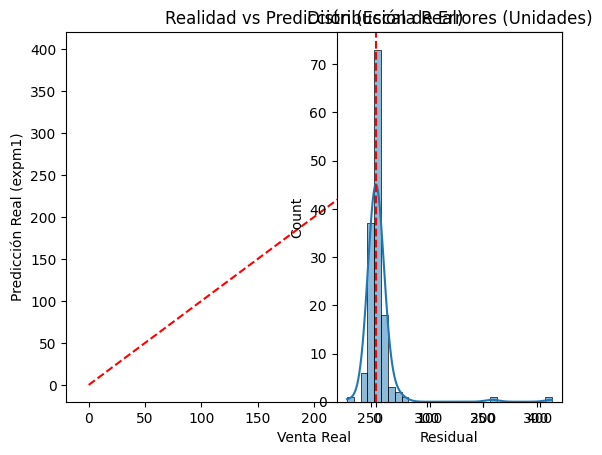

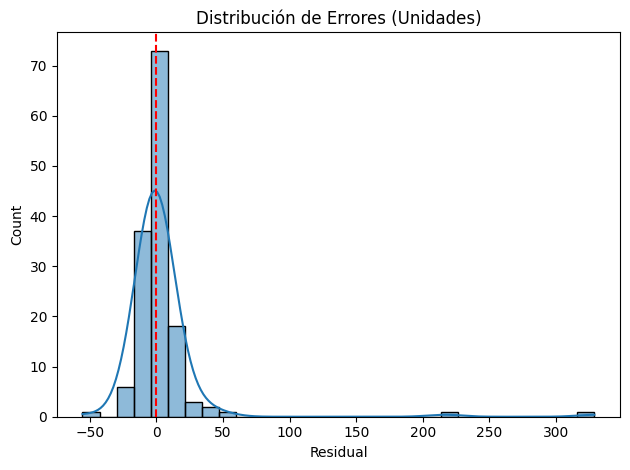

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.ml.evaluation import RegressionEvaluator
from builtins import abs
import pyspark.sql.functions as F 

# ==============================================================================
# 8. SUITE DE EVALUACIÓN (ADAPTADA A LOG-NORMAL)
# ==============================================================================
print("--- 🕵️‍♂️ Iniciando Auditoría del Modelo (Escala Real) ---")

# 1. Generar Predicciones (Esto incluye la transformación inversa 'prediction_real')
final_predictions = best_model.transform(test_data)

# Definimos las columnas a comparar (Realidad vs Predicción en Unidades)
col_real = "Venta_Unidades"
col_pred = "prediction_real"

# ---------------------------------------------------------
# [1] MÉTRICAS DE NEGOCIO (UNIDADES REALES)
# ---------------------------------------------------------
print("\n[1] MÉTRICAS DE ERROR Y NEGOCIO")

# Calculamos métricas manualmente o con Evaluator sobre las columnas reales
evaluator_rmse = RegressionEvaluator(labelCol=col_real, predictionCol=col_pred, metricName="rmse")
evaluator_mae = RegressionEvaluator(labelCol=col_real, predictionCol=col_pred, metricName="mae")
evaluator_r2 = RegressionEvaluator(labelCol=col_real, predictionCol=col_pred, metricName="r2")

rmse = evaluator_rmse.evaluate(final_predictions)
mae = evaluator_mae.evaluate(final_predictions)
r2 = evaluator_r2.evaluate(final_predictions)

# MAPE
mape_df = final_predictions.withColumn(
    "APE", F.abs((F.col(col_real) - F.col(col_pred)) / (F.col(col_real) + 1))
)
mape_score = mape_df.select(F.avg("APE")).collect()[0][0] * 100

print(f"  > RMSE (Error Cuadrático): {rmse:.2f}")
print(f"  > MAE (Error Absoluto):    {mae:.2f} (En promedio fallamos por {mae:.2f} unidades)")
print(f"  > R² (Varianza Explicada): {r2:.2%} (Ideal: > 0%)")
print(f"  > MAPE (Error Porcentual): {mape_score:.2f}%")

# ---------------------------------------------------------
# [2] ANÁLISIS DE RESIDUOS
# ---------------------------------------------------------
print("\n[2] ANÁLISIS DE RESIDUOS (En Unidades)")
df_residuals = final_predictions.withColumn("Residual", F.col(col_real) - F.col(col_pred))

res_stats = df_residuals.select(
    F.avg("Residual").alias("Mean_Residual"),
    F.stddev("Residual").alias("Std_Residual")
).collect()[0]

mean_res = res_stats['Mean_Residual']
print(f"  > Promedio del Residuo: {mean_res:.4f}")

if abs(mean_res) > 5: # Tolerancia un poco más alta en unidades reales
    print("    ⚠️ ALERTA: Sesgo significativo detectado.")
    if mean_res > 0:
        print("      -> El modelo es PESIMISTA (Vendes más de lo que predice).")
    else:
        print("      -> El modelo es OPTIMISTA (Predice más de lo que vendes).")
else:
    print("    ✅ Residuo aceptable. El modelo está balanceado.")

# ---------------------------------------------------------
# [3] IMPORTANCIA DE VARIABLES
# ---------------------------------------------------------
print("\n[3] IMPORTANCIA DE VARIABLES")

# OJO: El modelo RF ahora es el PENÚLTIMO paso (stages[-2]) 
# porque el último (stages[-1]) es el SQLTransformer que hace el expm1
rf_model = best_model.stages[-2]

# Extraemos metadatos de la columna 'features'
# Usamos final_predictions que ya tiene 'features' creado
try:
    features_meta = final_predictions.schema["features"].metadata["ml_attr"]
    
    # Recolectamos TODOS los tipos de atributos (numeric, nominal, binary)
    all_attrs = []
    if "attrs" in features_meta:
        for attr_type in ["numeric", "nominal", "binary"]:
            if attr_type in features_meta["attrs"]:
                all_attrs.extend(features_meta["attrs"][attr_type])
    
    # Ordenar por índice y extraer nombres
    attrs = sorted((attr["idx"], attr["name"]) for attr in all_attrs)
    feature_names = [name for idx, name in attrs]
    importances = rf_model.featureImportances.toArray()

    # DataFrame para visualizar
    feat_imp_pd = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False).head(10)

    for index, row in feat_imp_pd.iterrows():
        print(f"    - {row['Feature']}: {row['Importance']:.4f}")
except Exception as e:
    print(f"Aviso: No se pudo extraer importancia detallada ({e}). Mostrando crudo.")
    print(rf_model.featureImportances)

# ---------------------------------------------------------
# [4] GRÁFICOS
# ---------------------------------------------------------
print("\n[4] GRÁFICOS")
sample_pd = df_residuals.select(col_real, col_pred, "Residual").sample(fraction=0.2, seed=42).limit(5000).toPandas()
# Usar la función max de pandas para evitar conflictos
max_val_real = sample_pd[col_real].max()
max_val_pred = sample_pd[col_pred].max()
max_val = max_val_real if max_val_real > max_val_pred else max_val_pred
plt.plot([0, max_val], [0, max_val], 'r--')
plt.xlabel('Venta Real')
plt.ylabel('Predicción Real (expm1)')
plt.title('Realidad vs Predicción (Escala Real)')

# B. Residuos
plt.subplot(1, 2, 2)
sns.histplot(sample_pd['Residual'], kde=True, bins=30)
plt.axvline(0, color='r', linestyle='--')
plt.title('Distribución de Errores (Unidades)')



plt.show()
plt.tight_layout()
sns.histplot(sample_pd['Residual'], kde=True, bins=30)
plt.axvline(0, color='r', linestyle='--')
plt.title('Distribución de Errores (Unidades)')

plt.tight_layout()
plt.show()

## 8. PRUEBA

In [62]:
from pyspark.sql.functions import lit, col, desc

# ==============================================================================
# 9. SIMULADOR DE RECOMENDACIONES (PRUEBA DE CONCEPTO)
# ==============================================================================

def recomendar_productos(nombre_cliente_busqueda):
    print(f"--- 🔍 Generando recomendaciones para: {nombre_cliente_busqueda} ---")
    
    # 1. Obtener datos del cliente (Región, Zona) para dar contexto
    # Usamos df_full (tu dataset completo cargado en memoria)
    info_cliente = df_full.filter(col("Cliente") == nombre_cliente_busqueda).select("Region", "Nombre_Zona").limit(1).collect()
    
    if not info_cliente:
        print("❌ Error: Cliente no encontrado en la base de datos.")
        return

    region_cliente = info_cliente[0]["Region"]
    zona_cliente = info_cliente[0]["Nombre_Zona"]
    mes_actual = "OCT" # Simulamos que estamos en Octubre para recomendar
    mes_num = 10
    
    print(f"   > Contexto: Zona {zona_cliente} ({region_cliente}) - Mes: {mes_actual}")

    # 2. Obtener LISTA DE PRODUCTOS candidatos
    # En un sistema real, filtraríamos los que YA compró. Aquí probaremos con todos para ver qué predice.
    # Seleccionamos productos únicos y su precio promedio actual
    catalogo_productos = df_full.select("Producto", "Precio_Unitario", "ID_Articulo", 
                                      "Venta_PY_Zona_Unidades", "Venta_PY_Familia_Unidades",
                                      "Meta_Zona_Unidades", "Precio_Promedio_PY_Zona") \
                              .dropDuplicates(["Producto"]) \
                              .limit(50) # Limitamos a 50 productos para que sea rápido la prueba
    
    # 3. Construir el DataFrame de Simulación
    # "Clonamos" al cliente para cada producto del catálogo
    df_simulacion = catalogo_productos.withColumn("Cliente", lit(nombre_cliente_busqueda)) \
                                      .withColumn("Region", lit(region_cliente)) \
                                      .withColumn("Nombre_Zona", lit(zona_cliente)) \
                                      .withColumn("Mes", lit(mes_actual)) \
                                      .withColumn("Mes_Num", lit(mes_num))

    # 4. Ejecutar el Modelo
    # El modelo predice el Logaritmo, así que transformamos de vuelta
    predicciones = best_model.transform(df_simulacion)
    
    # 5. Mostrar el Top 5 Recomendaciones
    print("\n--- 💡 TOP 5 PRODUCTOS RECOMENDADOS ---")
    top_recs = predicciones.select("Producto", "Precio_Unitario", "prediction_real") \
                           .orderBy(desc("prediction_real")) \
                           .limit(5)
    
    top_recs.show(truncate=False)
    
    # Extra: Análisis de Elasticidad (Opcional)
    # Tomamos el producto #1 y vemos qué pasa si bajamos el precio
    mejor_producto = top_recs.collect()[0]["Producto"]
    precio_actual = top_recs.collect()[0]["Precio_Unitario"]
    pred_actual = top_recs.collect()[0]["prediction_real"]
    
    print(f"\n--- 🧪 Análisis de Escenario para '{mejor_producto}' ---")
    print(f"   Precio Actual: {precio_actual:.2f} -> Demanda Predicha: {pred_actual:.2f} uds")
    
    # Simulamos descuento del 10%
    precio_nuevo = precio_actual * 0.90
    
    # Creamos fila de escenario
    df_escenario = df_simulacion.filter(col("Producto") == mejor_producto) \
                                .withColumn("Precio_Unitario", lit(precio_nuevo))
    
    pred_escenario = best_model.transform(df_escenario).select("prediction_real").collect()[0][0]
    
    cambio = ((pred_escenario - pred_actual) / pred_actual) * 100
    print(f"   Precio -10% ({precio_nuevo:.2f})  -> Demanda Predicha: {pred_escenario:.2f} uds")
    print(f"   Impacto estimado: {cambio:+.2f}% en ventas.")

# --- EJECUTAR PRUEBA ---
# Elige un cliente que sepas que existe en tu data, por ejemplo uno del top de ventas
# Puedes ver clientes con: df_full.select("Cliente").show(5)

# Reemplaza "NOMBRE_DEL_CLIENTE_AQUI" con uno real de tu output anterior
cliente_prueba = "ADMINISTRADORA CLINICA TRESA S.A" # Ejemplo, cámbialo por uno tuyo
recomendar_productos(cliente_prueba)

--- 🔍 Generando recomendaciones para: ADMINISTRADORA CLINICA TRESA S.A ---
   > Contexto: Zona CHICLAYO (NORTE) - Mes: OCT

--- 💡 TOP 5 PRODUCTOS RECOMENDADOS ---
+-------------------------------------------------+---------------+------------------+
|Producto                                         |Precio_Unitario|prediction_real   |
+-------------------------------------------------+---------------+------------------+
|LAGRICEL OFTENO LIBRE DE CONSERVADORES (PF) 10 ML|56.81          |17.694548112797065|
|TRAZIDEX UNGENA 3.5 G                            |46.76          |16.394213433118527|
|ELIPTIC OFTENO 5ML PF PERU                       |33.97          |12.943335965723072|
|GAAP OFTENO LIBRE DE CONSER PF 3 ML PERU         |79.34          |11.792526491530658|
|AGGLAD OFTENO 5 ML                               |34.25          |11.645650995302903|
+-------------------------------------------------+---------------+------------------+


--- 🧪 Análisis de Escenario para 'LAGRICEL OFTENO LI